In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use ('ggplot')
import seaborn as sns
%matplotlib inline
sns.set_style(style="whitegrid")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text

import nltk, string, contractions
from nltk.stem.porter import PorterStemmer


from bs4 import BeautifulSoup

In [160]:
df1 = pd.read_csv('data/microwave1_df')
df2 = pd.read_csv('data/microwave2_df')
df3 = pd.read_csv('data/microwave3_df')

FileNotFoundError: [Errno 2] File data/microwave1_df does not exist: 'data/microwave1_df'

In [74]:
df1.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.875000e+03,1875.0,1875.000000,1875.000000,1875.000000
mean,3.209401e+07,168831590.0,3.850133,3.107733,3.628267
std,1.476223e+07,0.0,1.496151,20.062047,20.926332
min,8.722000e+04,168831590.0,1.000000,0.000000,0.000000
25%,1.748780e+07,168831590.0,3.000000,0.000000,0.000000
50%,3.303278e+07,168831590.0,5.000000,1.000000,1.000000
75%,4.624525e+07,168831590.0,5.000000,2.000000,2.000000
max,5.309426e+07,168831590.0,5.000000,589.000000,599.000000


In [39]:
df2.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.722000e+03,1722.0,1722.000000,1722.000000,1722.000000
mean,2.938541e+07,893639231.0,3.967480,4.688734,5.199187
std,1.544035e+07,0.0,1.356367,53.410926,55.618453
min,3.676500e+04,893639231.0,1.000000,0.000000,0.000000
25%,1.531976e+07,893639231.0,3.000000,0.000000,0.000000
50%,2.902834e+07,893639231.0,5.000000,0.000000,1.000000
75%,4.391438e+07,893639231.0,5.000000,1.750000,2.000000
max,5.309336e+07,893639231.0,5.000000,1349.000000,1390.000000


In [40]:
df3.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,8.840000e+02,884.0,884.000000,884.000000,884.000000
mean,3.212307e+07,978779937.0,3.850679,2.972851,3.338235
std,1.522955e+07,0.0,1.429463,27.856438,29.452533
min,8.386200e+04,978779937.0,1.000000,0.000000,0.000000
25%,1.815530e+07,978779937.0,3.000000,0.000000,0.000000
50%,3.271676e+07,978779937.0,4.000000,0.000000,0.000000
75%,4.691119e+07,978779937.0,5.000000,1.000000,1.000000
max,5.309392e+07,978779937.0,5.000000,583.000000,613.000000


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marketplace        1875 non-null   object 
 1   customer_id        1875 non-null   int64  
 2   review_id          1875 non-null   object 
 3   product_id         1875 non-null   object 
 4   product_parent     1875 non-null   int64  
 5   product_title      1875 non-null   object 
 6   product_category   1875 non-null   object 
 7   star_rating        1875 non-null   float64
 8   helpful_votes      1875 non-null   float64
 9   total_votes        1875 non-null   float64
 10  vine               1875 non-null   object 
 11  verified_purchase  1875 non-null   object 
 12  review_headline    1875 non-null   object 
 13  review_body        1875 non-null   object 
 14  review_date        1875 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 219.9+ KB


In [42]:
df1.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,44300577,R2ZU11YALTJNZX,B0009KMYHI,168831590,Panasonic Genius 1250 Watt Sensor Microwave w/...,Kitchen,1.0,0.0,0.0,N,Y,I have had this microwave for just over 3 year...,I have had this microwave for just over 3 year...,2015-08-31
1,US,50952586,RVBITZNBVJ8AI,B0009KMYHI,168831590,Panasonic Genius 1250 Watt Sensor Microwave w/...,Kitchen,5.0,0.0,0.0,N,Y,It takes a good bit of room on the counter,Man this thing cooks evenly and fast! It takes...,2015-08-30
2,US,31144708,R44LZL0OR5EWP,B0009KMYDM,168831590,Panasonic Genius 1250 Watt Sensor Microwave w/...,Kitchen,5.0,0.0,0.0,N,Y,Five Stars,Works great! Have had it over a year and no su...,2015-08-30
3,US,14667788,RPWWYNUD9X64U,B0009KMYHI,168831590,Panasonic Genius 1250 Watt Sensor Microwave w/...,Kitchen,5.0,0.0,0.0,N,Y,... received this several years ago and it sti...,I ordered and received this several years ago ...,2015-08-29
4,US,25468208,RS76DCCGM685B,B0009KMYGY,168831590,Panasonic Genius 1250 Watt Sensor Microwave w/...,Kitchen,1.0,3.0,3.0,N,Y,Avoid Panasonic - Doors Don't Close,I have had this microwave for just over 2 year...,2015-08-28


Reviewing the values and counts that are within each column. This will help us identify where to focus the bulk of our analysis, making EDA more productive.

In [43]:
for column in df1.columns:
    print(column)
    print()
    print(df1[column].value_counts())
    print('_______________________________')

marketplace



NameError: name 'df' is not defined

With the above we can see there are some data features that are redundant and not important for our purposes in this analysis.

Those include:
- 'product_parent'
- 'product_title'
- 'product_category'
- 'vine'

In [44]:
type(df1.review_date[0])

str

In [135]:
df1.review_date = pd.to_datetime(df1.review_date)
type(df1.review_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
df2.review_date = pd.to_datetime(df2.review_date)

In [36]:
df3.review_date = pd.to_datetime(df3.review_date)

In [13]:
review_text1 = df1.review_body
review_words1 = review_text1.str.split().str.len()
review_words1
# review_text2 = df2.review_body
# review_words2 = review_text2.str.split().str.len()
# review_text3 = df3.review_body
# review_words3 = review_text3.str.split().str.len()

0        91
1        23
2        17
3        13
4       131
       ... 
1870     74
1871     21
1872     67
1873     20
1874    182
Name: review_body, Length: 1854, dtype: int64

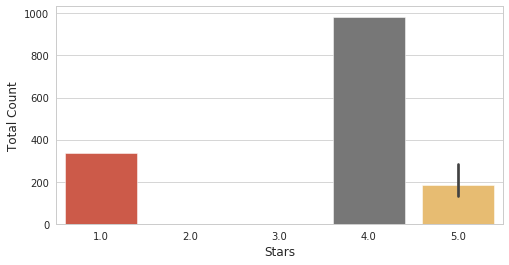

In [134]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(df1['star_rating'], df1.star_rating.value_counts())
ax.set(xlabel= "Stars", ylabel="Total Count")
plt.show()

In [36]:
len(np.unique(review_words1[(review_words1<(review_words1.mean()+2*word_std1))]))/10

23.5

In [33]:
outlier_limit = review_words1.mean()+2*word_std1

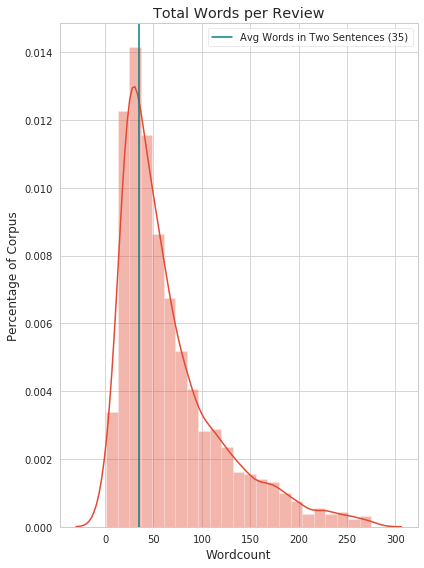

In [71]:
word_std1=np.std(review_words1)
fig, ax = plt.subplots(figsize=(6,8))
sns.distplot(review_words1[(review_words1<outlier_limit)], bins=23)
plt.axvline(35, color = 'teal', label = "Avg Words in Two Sentences (35)")
ax.set(xlabel= "Wordcount", ylabel="Percentage of Corpus")
ax.set_title("Total Words per Review")
ax.legend()
plt.tight_layout()
plt.show()

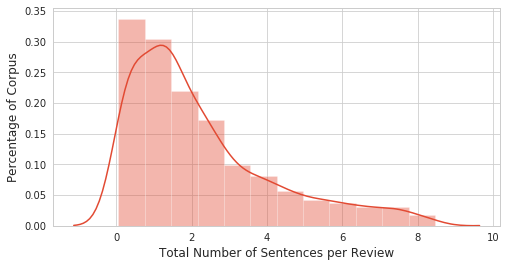

In [40]:
word_std2=np.std(review_words2)
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(review_words2[(review_words2<(2*word_std2))]/17.5, bins=12)
ax.set(xlabel= "Total Number of Sentences per Review", ylabel="Percentage of Corpus")
plt.show()

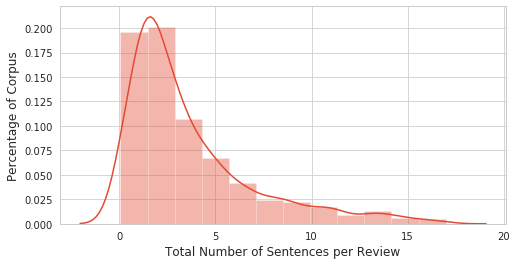

In [41]:
word_std3=np.std(review_words3)
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(review_words3[(review_words3<(2*word_std3))]/17.5, bins=12)
ax.set(xlabel= "Total Number of Sentences per Review", ylabel="Percentage of Corpus")
plt.show()

In [92]:
review_words1[(review_words1<(2*word_std1))].mean(), review_words2.mean(), review_words3.mean()

(59.717328727691424, 55.36295005807201, 88.12782805429865)

In [107]:
df1.star_rating.value_counts()

5.0    984
4.0    335
1.0    285
2.0    139
3.0    132
Name: star_rating, dtype: int64

<!-- # First Microwave
Less than 7% have a review that is shorter than the average sentence, and 34% have a review shorter than two average sentences. I believe this will be barely enough to draw inferences based on the size of the dataset, but it should still be enough.
# Second Microwave -->

In [137]:
df1['review_wordcount'] = review_words1
df_obj1 = ['marketplace', 'customer_id', 'review_id', 'product_id', 'verified_purchase',
          'review_headline', 'review_body']
df_num1 = df1[['star_rating', 'helpful_votes', 'total_votes', 'review_date', 'review_wordcount']]

df2['review_wordcount'] = review_words2
df_obj2 = ['marketplace', 'customer_id', 'review_id', 'product_id', 'verified_purchase',
          'review_headline', 'review_body']
df_num2 = df2[['star_rating', 'helpful_votes', 'total_votes', 'review_date', 'review_wordcount']]

df3['review_wordcount'] = review_words3
df_obj3 = ['marketplace', 'customer_id', 'review_id', 'product_id', 'verified_purchase',
          'review_headline', 'review_body']
df_num3 = df3[['star_rating', 'helpful_votes', 'total_votes', 'review_date', 'review_wordcount']]


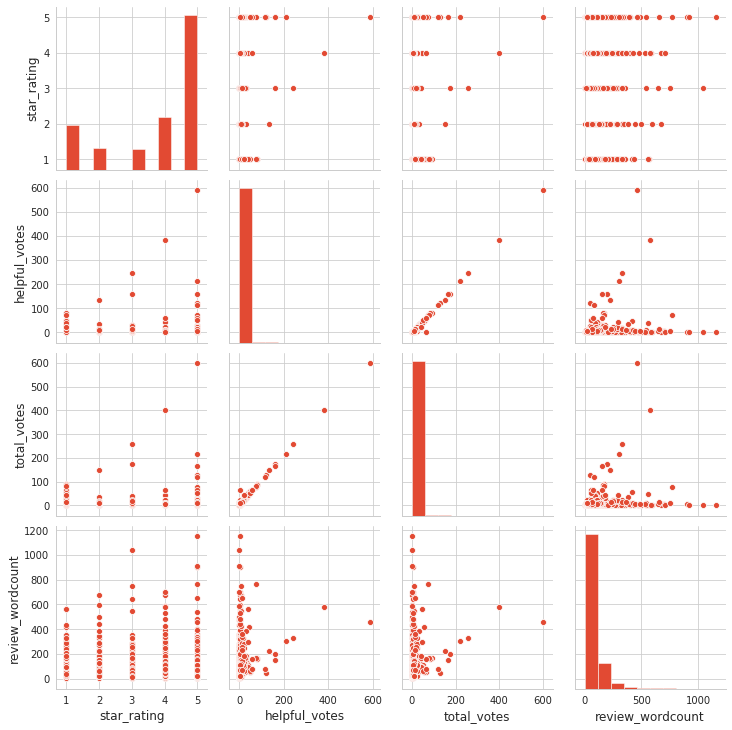

In [49]:
sns.pairplot(df_num1)

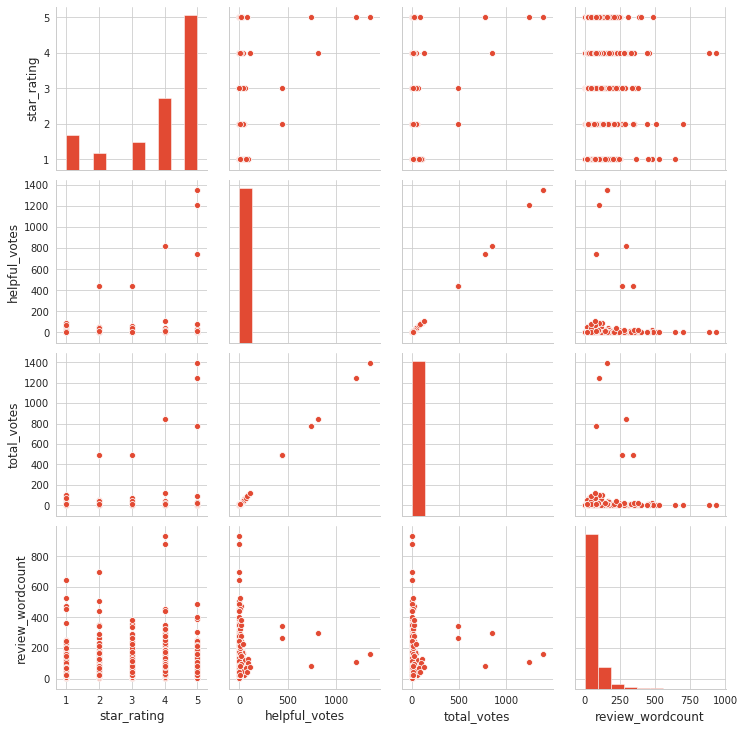

In [50]:
sns.pairplot(df_num2)

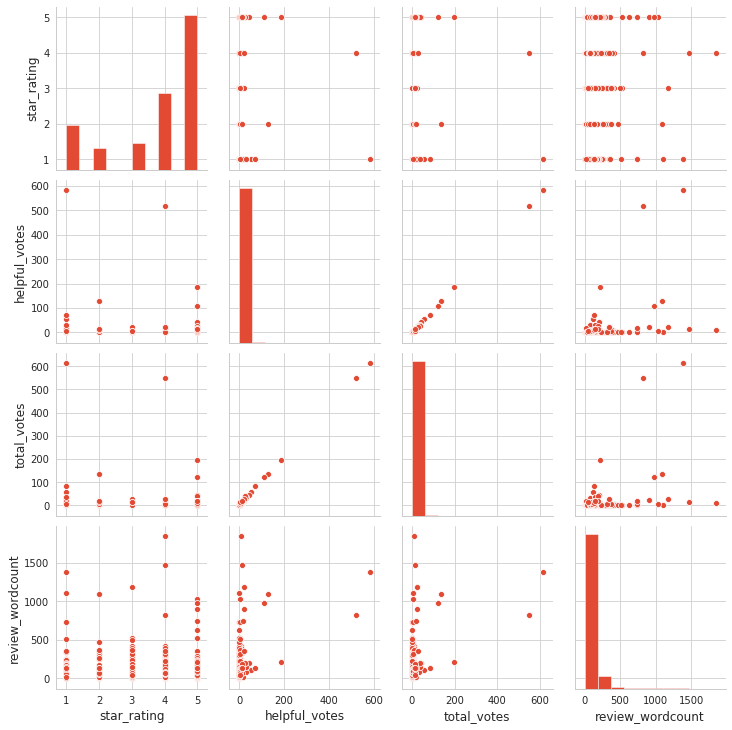

In [51]:
sns.pairplot(df_num3)

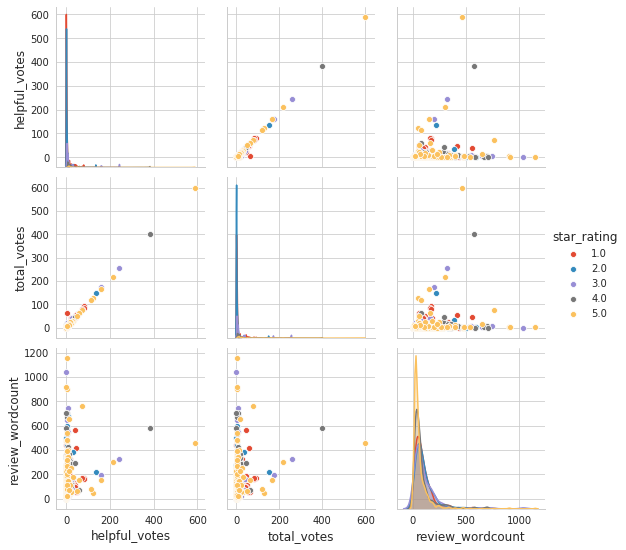

In [52]:
sns.pairplot(df_num1, hue='star_rating')

In [138]:
df1.drop('marketplace', axis = 1, inplace = True)
df1.drop('product_parent', axis = 1, inplace = True)
df1.drop('product_title', axis = 1, inplace = True)
df1.drop('product_category', axis = 1, inplace = True)
df1.drop('vine', axis = 1, inplace = True)

df2.drop('marketplace', axis = 1, inplace = True)
df2.drop('product_parent', axis = 1, inplace = True)
df2.drop('product_title', axis = 1, inplace = True)
df2.drop('product_category', axis = 1, inplace = True)
df2.drop('vine', axis = 1, inplace = True)

df3.drop('marketplace', axis = 1, inplace = True)
df3.drop('product_parent', axis = 1, inplace = True)
df3.drop('product_title', axis = 1, inplace = True)
df3.drop('product_category', axis = 1, inplace = True)
df3.drop('vine', axis = 1, inplace = True)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1875 non-null   int64  
 1   review_id          1875 non-null   object 
 2   product_id         1875 non-null   object 
 3   star_rating        1875 non-null   float64
 4   helpful_votes      1875 non-null   float64
 5   total_votes        1875 non-null   float64
 6   verified_purchase  1875 non-null   object 
 7   review_headline    1875 non-null   object 
 8   review_body        1875 non-null   object 
 9   review_date        1875 non-null   object 
 10  review_wordcount   1875 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 161.3+ KB


In [139]:
def clean_html(row):
    '''
    Given a row, this function removes html tags in case they exist within our reviews
    '''
    soup = BeautifulSoup(row['review_body'], "lxml")
    return soup.get_text()

In [140]:
df1['clean_review'] = df1.apply(clean_html, axis=1)
df2['clean_review'] = df2.apply(clean_html, axis=1)
df3['clean_review'] = df3.apply(clean_html, axis=1)

In [141]:
def remove_punctuations(text):
    punct =[]
    punct += list(string.punctuation)
    punct += '’'
    punct.remove("'")
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text


In [63]:
keep_words = ['not', 'fire', 'off']
test_stop_words = []
review_stop_words = ['panasonic', 'really', 'husband', 'thanks', 'thank', 'ha', 
              'just', 'thing', 'did', 'nn', 'wa', 'yr', 'u', 'say', 'doe',
              'mom', 'christmas', 'gift', 'got', 'way', 'le', 'daughter', "i'mwork",
              'e','not','love','good','bought','great microwave','micro','nicely',
              'great oven','microwave','product','work great','nice work', "i'm",
              'work great use','work great love','feature work great', 'genius',
              'unit work great','oven work great','easy use love','old oven',
              'old old','20 year old','unit', 'not', 'work', 'amazon', 'com', 'cu',
              'old', 'wife', 'highly', 'recommend', 'like', 'charm', 'sharp', 'ft', 
              'easy', 'oven', 'use', 'year', 'lot', 'pleased', 'happy', 'hope',
              'review', 'buy', 'far', 'day', '1', '2', '3', '4', '5', '6', '7',
              '8', '9', '10', '20', 'great', 'excellent','feature', 'nice', 'old',
              'geniusunit', "don't", "doesn't", '34', '1250', 'br', "it's", 'does',
              'doesn', 'don', 'mwork', '2.2']
for _ in text.ENGLISH_STOP_WORDS:
    if _ in keep_words:
        pass
    else:
        review_stop_words.append(_)
for _ in test_stop_words:
    review_stop_words.append(_)


In [143]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [144]:
def nlp_prep(df):
    # lowercase everything
    # get rid of '\n' from whitespace
    # regex remove hyperlinks
    # remove punctuation
    # remove ' s ' from removing punctuation
    
    # lowercase everything
    df['model_ready'] = df['clean_review'].apply(lambda x: x.lower())
    # expand contractions
    df['model_ready'] = df['model_ready'].apply(lambda x:[contractions.fix(word) for word in x.split()])
    df['model_ready'] = [' '.join(map(str, l)) for l in df['model_ready']]
    # get rid of '\n' from whitespace 
    df['model_ready'] = df['model_ready'].apply(lambda x: x.replace('\n', ' '))
    # regex remove hyperlinks
    df['model_ready'] = df['model_ready'].str.replace('http\S+|www.\S+', '', case=False)
    # remove punctuations
    df['model_ready'] = df['model_ready'].apply(remove_punctuations)
    # remove ' s ' that was created after removing punctuations
    df['model_ready'] = df['model_ready'].apply(lambda x: str(x).replace(" s ", " "))
    # lemmatize words and return as string
    df['model_ready'] = df['model_ready'].apply(lemmatize_text).str.join(' ')
    # stem words
    df['model_ready'] = df['model_ready'].apply(PorterStemmer().stem)
    # remove stop words
    df['model_ready'] = df['model_ready'].apply(lambda x: ' '.join([word for word in x.split() if word not in (review_stop_words)]))
    return df

In [145]:
nlp_prep(df1)

,customer_id,review_id,product_id,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,review_date,review_wordcount,clean_review,model_ready
0,44300577,R2ZU11YALTJNZX,B0009KMYHI,1.0,0.0,0.0,Y,I have had this microwave for just over 3 year...,I have had this microwave for just over 3 year...,2015-08-31,91,I have had this microwave for just over 3 year...,door close know door closed turn irritating ha...
1,50952586,RVBITZNBVJ8AI,B0009KMYHI,5.0,0.0,0.0,Y,It takes a good bit of room on the counter,Man this thing cooks evenly and fast! It takes...,2015-08-30,23,Man this thing cooks evenly and fast! It takes...,man cook evenly fast bit room counter room spa...
2,31144708,R44LZL0OR5EWP,B0009KMYDM,5.0,0.0,0.0,Y,Five Stars,Works great! Have had it over a year and no su...,2015-08-30,17,Works great! Have had it over a year and no su...,surprise large microwav
3,14667788,RPWWYNUD9X64U,B0009KMYHI,5.0,0.0,0.0,Y,... received this several years ago and it sti...,I ordered and received this several years ago ...,2015-08-29,13,I ordered and received this several years ago ...,ordered received ago
4,25468208,RS76DCCGM685B,B0009KMYGY,1.0,3.0,3.0,Y,Avoid Panasonic - Doors Don't Close,I have had this microwave for just over 2 year...,2015-08-28,131,I have had this microwave for just over 2 year...,door close know door closed turn google proble...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,33705501,R34GY91QSWWUE4,B0009KMYGY,4.0,60.0,64.0,N,Just right for me...,The Panasonic NN-H765WF was exactly what I was...,2006-03-23,74,The Panasonic NN-H765WF was exactly what I was...,h765wf exactly looking wanted white match appl...
1871,39268146,R7N1LRCV8GU6L,B0009KMYHI,5.0,5.0,10.0,Y,good looking-good cooking,this microwave cooks food very evenly-no need ...,2006-03-19,21,this microwave cooks food very evenly-no need ...,cook food evenly need stir think best looking ...
1872,19314267,R15KWS9QSI7URC,B0009KMYDM,5.0,12.0,13.0,Y,Panasonic NN-H965WF Luxury full-size 2.2 cu.ft...,"its a great microwave , i use it every day , i...",2006-03-16,67,"its a great microwave , i use it every day , i...",large fit heat evenly unlike defrosting fast m...
1873,11400155,RK5HSUM1GNRH8,B0009KMYDM,5.0,4.0,9.0,N,Panasonic Microwave Oven NN-965WF,Have had it for only a short time but it has p...,2006-02-24,20,Have had it for only a short time but it has p...,short time performed flawlessly purchas


In [59]:
# nlp_prep(df2)

In [60]:
# nlp_prep(df3)

In [158]:
df1.to_csv("modeling_ready_microwave1", index=False)

In [56]:
df1 = pd.read_csv('data/modeling_ready_microwave1')
df1.dropna(inplace=True)

In [57]:
# df2.to_csv("modeling_ready_microwave2", index=False)

In [58]:
# df3.to_csv("modeling_ready_microwave3", index=False)

In [59]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=review_stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [60]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=review_stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [61]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=review_stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

No handles with labels found to put in legend.


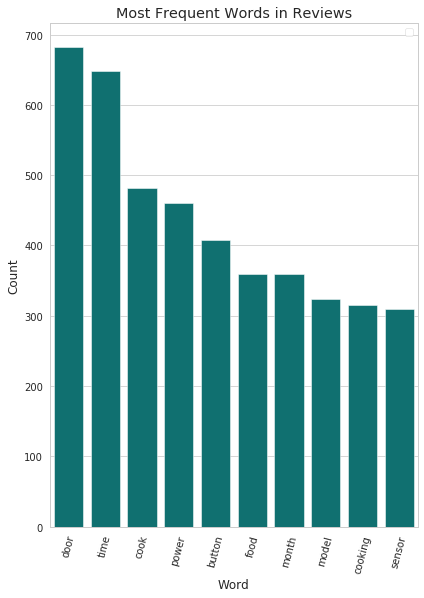

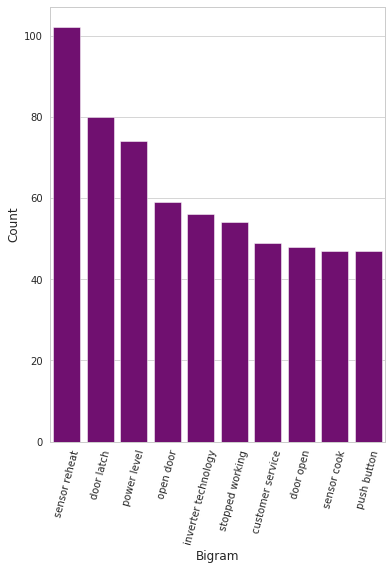

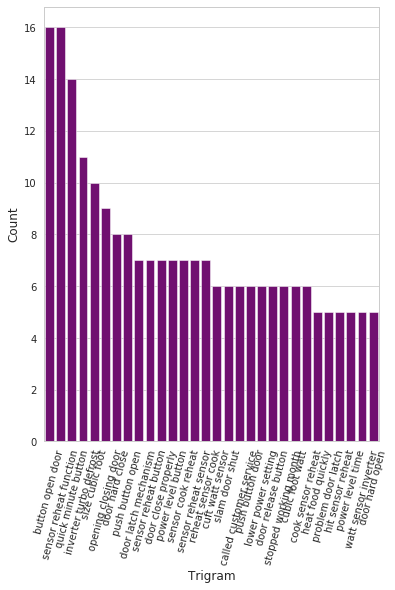

In [70]:
common_words = get_top_n_words(df1['model_ready'], 10)
common_bigrams = get_top_n_bigram(df1['model_ready'], 10)
common_trigrams = get_top_n_trigram(df1['model_ready'], 30)

df1_uni = pd.DataFrame(common_words, columns = ['Word' , 'Count'])
df1_bi = pd.DataFrame(common_bigrams, columns = ['Bigram' , 'Count'])
df1_tri = pd.DataFrame(common_trigrams, columns = ['Trigram' , 'Count'])

fig, ax = plt.subplots(figsize=(6,8))
sns.barplot(x= 'Word', y = 'Count', data = df1_uni, color = 'teal' )
ax.set_title("Most Frequent Words in Reviews")
ax.legend()
plt.tight_layout()
plt.xticks(rotation=75)

fig, ax = plt.subplots(figsize=(6,8))
sns.barplot(x= 'Bigram', y = 'Count', data = df1_bi, color = 'purple')
plt.xticks(rotation=75)

fig, ax = plt.subplots(figsize=(6,8))
sns.barplot(x= 'Trigram', y = 'Count', data = df1_tri, color = 'purple')
plt.xticks(rotation=75)
plt.show()

In [67]:
# common_words = get_top_n_words(df2['model_ready'], 30)
# common_bigrams = get_top_n_bigram(df2['model_ready'], 30)
# common_trigrams = get_top_n_trigram(df2['model_ready'], 30)

# df2_uni = pd.DataFrame(common_words, columns = ['Unigram' , 'Count'])
# df2_bi = pd.DataFrame(common_bigrams, columns = ['Bigram' , 'Count'])
# df2_tri = pd.DataFrame(common_trigrams, columns = ['Trigram' , 'Count'])

# fig, ax = plt.subplots(figsize=(12,4))
# sns.barplot(x= 'Unigram', y = 'Count', data = df2_uni, color = 'purple')
# plt.xticks(rotation=75)

# fig, ax = plt.subplots(figsize=(12,4))
# sns.barplot(x= 'Bigram', y = 'Count', data = df2_bi, color = 'purple')
# plt.xticks(rotation=75)

# fig, ax = plt.subplots(figsize=(12,4))
# sns.barplot(x= 'Trigram', y = 'Count', data = df2_tri, color = 'purple')
# plt.xticks(rotation=75)
# plt.show()

In [65]:
# common_words = get_top_n_words(df3['model_ready'], 30)
# common_bigrams = get_top_n_bigram(df3['model_ready'], 30)
# common_trigrams = get_top_n_trigram(df3['model_ready'], 30)

# df3_uni = pd.DataFrame(common_words, columns = ['Unigram' , 'Count'])
# df3_bi = pd.DataFrame(common_bigrams, columns = ['Bigram' , 'Count'])
# df3_tri = pd.DataFrame(common_trigrams, columns = ['Trigram' , 'Count'])

# fig, ax = plt.subplots(figsize=(12,4))
# sns.barplot(x= 'Unigram', y = 'Count', data = df3_uni, color = 'purple')
# plt.xticks(rotation=75)

# fig, ax = plt.subplots(figsize=(12,4))
# sns.barplot(x= 'Bigram', y = 'Count', data = df3_bi, color = 'purple')
# plt.xticks(rotation=75)

# fig, ax = plt.subplots(figsize=(12,4))
# sns.barplot(x= 'Trigram', y = 'Count', data = df3_tri, color = 'purple')
# plt.xticks(rotation=75)
# plt.show()

NameError: name 'word_std' is not defined

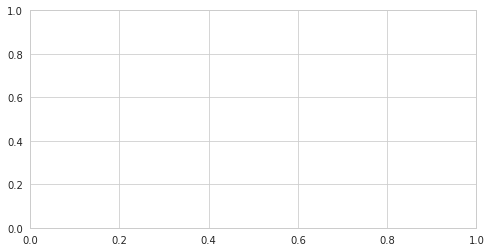

In [66]:
review_text = df1.model_ready
review_words = review_text.str.split().str.len()

fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(review_words1[(review_words1<(2*word_std))], bins=12)
ax.set(xlabel= "Total Number of Words per Review", ylabel="Percentage of Corpus")
plt.show()

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        1875 non-null   int64         
 1   review_id          1875 non-null   object        
 2   product_id         1875 non-null   object        
 3   star_rating        1875 non-null   float64       
 4   helpful_votes      1875 non-null   float64       
 5   total_votes        1875 non-null   float64       
 6   verified_purchase  1875 non-null   object        
 7   review_headline    1875 non-null   object        
 8   review_body        1875 non-null   object        
 9   review_date        1875 non-null   datetime64[ns]
 10  clean_review       1875 non-null   object        
 11  model_ready        1875 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 175.9+ KB
